#HW6 - Single Molecule Detection

In [7]:
# imports
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [9, 6]
matplotlib.rcParams['font.size'] = 11
import numpy as np
import scipy
import scipy.constants as scp
from scipy.misc import factorial

Single molecule spectroscopy has become a dominant technique because it allows one to by-pass the averaging effects when we are watching what millions of molecules are doing. The following questions are based on the article ["Real-Time Detection of Single Molecules in Solution by Confocal Fluorescence Microscopy"](http://pubs.acs.org/doi/abs/10.1021/ac00113a019) by Nie, Chiu, and Zare, Anal. Chem volume 67 pp 2849 (1995). This paper is one of the foundational papers for the field of single molecule spectroscopy. The paper uses Rhodamine 6G as the probe molecule. The spectroscopic properties of R6G are shown below (from F.P. Schafer - "Topics in Applied Physics - Dye Lasers", page 89, Springer-Verlag, 1977).

<img src="R6G.png">

The figure shows the cross-sections for absorption, $\sigma_\mathrm{s}$ and stimulated emission, $\sigma_\mathrm{em}$. If you need a quantity that is not given in the paper or in this document, feel free to estimate it.

## 1
For Rhodamine 6G, assume that the intersystem crossing rate (the rate of undergoing transitions from the $S_1$ state to the $T_1$ state) is $10^6 \,\, \mathrm{sec}^{-1}$, the radiative rate for the $S_1 \rightarrow S_0$ transition is $8 \times 10^7 \,\, \mathrm{sec}^{-1}$, and the internal coversion rate (the rate of undergoing transitions from the $S_1$ to the $S_0$ state) is $2 \times 10^7 \,\, \mathrm{sec}^{-1}$. The total rate is the sum of all the rates depopulating an energy level. The lifetime of a level is the reciprocal of the total rate. The quantum efficiency for a level emitting light is the ratio of the radiative rate to the total rate. The absorption cross-section is given on the graph. You should also remember the relationship $\ln(\frac{I_0}{I}) = \sigma N l$ where $I_0$ and $I$ are the light intensity before and after the sample, $\sigma$ is the absorption cross section in square cm, $N$ is the concentration in molecules per cubic cm, and $l$ is the pathlength in cm. Again, feel free to estimate some qantities if they are not given here or in the paper.

## 1a
From the spectra, draw an energy level diagram that shows the $S_0$, $S_1$ and $T_1$ levels in their appropriate positions using wavenumbers as the y axis.

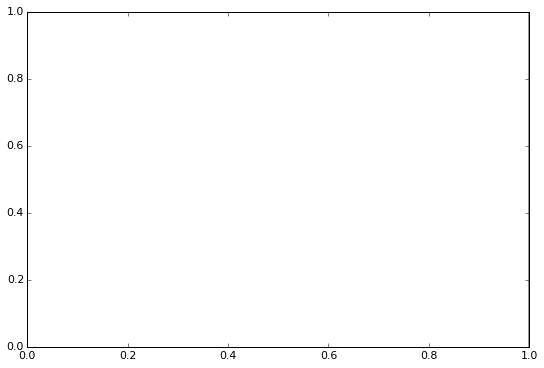

In [13]:
# see attached sheet
wave_abs = 325e-9
wave_em = 570e-9
wave_T = 600e-9
wavenum_abs = 1.0/wave_abs
wavenum_em = 1.0/wave_em
wavenum_T = 1.0/wave_T


#ax = plt.axes()
plt.arrow(1, 0, 1, wavenum_abs, head_width=0.05, head_length=1.0e6, fc='k', ec='k')
# plt.show()
#plt.axhline(wavenum_abs, c='r')

## 1b
For the conditions described in the paper, determine the number of photons per second absorbed in the sample by determing $I_0 - I$. Compare this rate with the total relaxation rate from the $S_1$ level (the sum of the radiative and internal conversion rates). Is the system saturated?

In [3]:
Power = 0.0007 # W
wavelength = 515e-9 # m
E = scp.h*scp.c/wavelength
f = 1.6e-3
n = 1.52
d0 = 0.65e-3
r0 = wavelength*f/(n*np.pi*d0)
Area = np.pi*(255e-9)**2
I0 = Power/Area
n_p = I0/(E) # number of photons/sec

l = 1.0e-6 # pathlength in m
N_total = 1.0e-4*scp.N_A*1.0e-3 # Total particles/cm^3
sigma = 2.15e-16
I = I0/np.exp(l*N_total*sigma)

rate_total = 1e6+2e7+8e7

print rate_total
print I0-I
print "the system is not saturated"

101000000.0
44366.4209452
the system is not saturated


## 1c
Saturation occurs with the rate of the absorption equals the rate of the relaxation from the level. Saturation results in a lower signal because the rate of emission is no longer proportional to the rate of the absorption because stimulated emission becomes important. Make a graph that shows the fluorescence rate in photons per second as a function the excitation power (watts) for the sample excited in this paper.

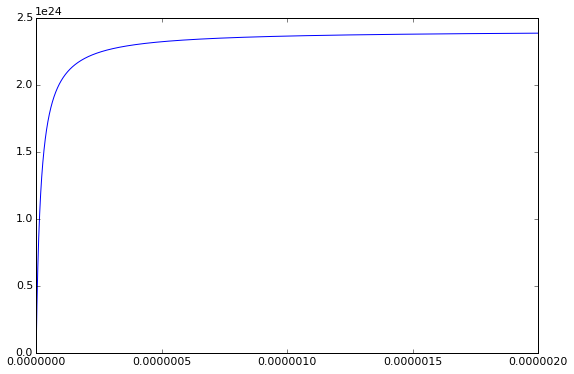

In [6]:
Power = np.linspace(0,0.02e-4,10000) # W
#Power = np.linspace(0,2e6,100000) # W
wavelength = 515e-9 # m
E = scp.h*scp.c/wavelength
n_p = Power/(E*Area)
tao1_inv = rate_total

N1 = sigma*n_p*N_total/(2*sigma*n_p+tao1_inv)
rate = N1*8e7

plt.plot(Power,rate)

## 1d
Taking into account the saturation effects, estimate the fluorescence signal in photons per second. You will need to know the fraction of the absorbed photons that are actually emitted as fluorescence. That fraction depends on the saturation and the fluorescence quantum efficiency. Your answer will correspond to one of the points in the curve you created in 1c.

In [5]:
Power = 0.0007 # W
wavelength = 515e-9 # m
Area = np.pi*(255e-9)**2
n_p = Power/(E*Area)
tao1_inv = rate_total

N1 = sigma*n_p*N_total/(2*sigma*n_p+tao1_inv)
rate = N1*8e7
QE_f = 8e7/rate_total
fluorescence = rate*QE_f
#need to account for saturation

print fluorescence, 'photons/sec'

1.90795471566e+24 photons/sec


## 1e
Find the signal in electrons per second from the emitted photons per second that are actually detected. For this you will need the solid angle, the beam splitter, and the quantum efficiency of the detector. Compare your estimate with the values given in the paper.

In [6]:
beamsplitter = 0.5
QE = 0.55

SA = (np.pi*wavelength**2)/(4*f**2) # limiting SA
pinhole = 50e-6
a = np.pi*pinhole**2# limiting area

signal = fluorescence*QE*beamsplitter*SA*a

print signal
print "In the paper, the electron counts (0-60) are significantly smaller than the value that I got"

335316567.695
In the paper, the electron counts (0-60) are significantly smaller than the value that I got


## 1f
If the laser is bright enough, it can equalize the populations of the ground and excited states. If the populations are equalized, what signal would you measure? How does it compare with the signal calculated in 1d? If one simply multiplies the rate of fluorescence by the excited state population, does one obtain the same answer? If the answers are different, explain why.

When the signals are equalized, the system is saturated and the rate of fluorescence would only depend on the rate leaving the excited state. This is how I calculated it in 1d. The answers would be the same, although now I'm thinking that I did the first parts wrong....

## 2
The paper contains 5 observations that prove the emission reported comes from single molecule fluorescence and not scattered light. What are those 5 observations?

The paper observes the effect on signal of dilution of R6G (zero/one dye molecule at lower concentration and significant overlap of double occupancy signals at higher conc.), solvent viscosity (longer transit times in viscous EtOH-glycerol), analyte molecular weight (longer transit for heavier TMR-avidin conjugate, and pH (lower fluorecence intensity at low pH) They also observed fluorescence saturation as the laser intensity increased.

## 3
Determine the detection volume using your knowlege about the beam waist $w_0$ and the confocal parameter $z_c$ of a focused laser beam. The confocal parameter is a measure of the length over which a focused Gaussian laser beam remains collimated at its beam waist.

\begin{equation}\Large
z_c = \frac{\pi w_0^2}{\lambda}
\end{equation}

How does your estimate of detection volume compare with the values assumed in the paper? Remember that 1 cubic cm defines 1 mL.

Note that the paper uses the term numerical aperture. The numerical aperature is $\mathrm{NA} = n \sin(\theta)$ where $n$ is the index of refraction (1 for air and 1.56 for oil), and $\theta$ is the angle of the light cone. For small $\theta$, $\mathrm{NA}$ is the inverse of the f number.

In [7]:
wave = np.array([488e-9,514.5e-9])
#r0 = np.array([250e-9,260e-9]) # m
f = 1.6e-3
n = 1.52
d0 = 0.65e-3*2
r0 = wave*f/(n*np.pi*d0)
w0 = 2*r0
zc = np.pi*w0**2/wave
Volume = 2*zc*np.pi*r0**2*1e6 # mL
print Volume
print "My values are one order of magnitude below the paper's experimental value of 5x10^-13 mL"
print "for 4 I will multiply by 10 to get the correct values"

[  4.04931794e-14   4.74546253e-14]
My values are one order of magnitude below the paper's experimental value of 5x10^-13 mL
for 4 I will multiply by 10 to get the correct values


## 4a
Show that there should be only one molecule in the detection volume on average if the R6G concentration is $3.3 \times 10^{-9} \,\, \mathrm{M}$.

In [8]:
molecules = 3.3e-9*scp.N_A*Volume*10/1000
print molecules

[ 0.80472364  0.94306891]


## 4b
The paper states "Poisson distribution predicts an equal probability (0.3679) for one or zero molecule in the probe volume and a lower probability (0.1839) for two molecules.". Make your own estimate of these quantities and compare them with the paper's estimates.

In [9]:
# you will need the factorial method, imported above from scipy.misc
k = np.arange(0,3)
P = molecules[1]**k*np.exp(-molecules[1])/factorial(k)

print P
print "This is very close to what the paper estimates, although I have a slightly different probabilities"
print "for 0 and 1 molecules because I used my molecules/detection volume value instead of just 1 molecule/det. vol."

[ 0.38943087  0.36726015  0.17317581]
This is very close to what the paper estimates, although I have a slightly different probabilities
for 0 and 1 molecules because I used my molecules/detection volume value instead of just 1 molecule/det. vol.


## 5
The paper assumes the diffusion constant for R6G is $2.8 \times 10^{-6} \,\, \frac{\mathrm{cm}^2}{\mathrm{sec}}$. Estimate the time required for a molecule to diffuse a distance of 250 nm, a reasonable estimate for the detection volume's size. You will need to find the relationship between the diffusion constant, the time for diffusion, and the distance that a randomly moving particle travels. How does this time relate to the dark periods described in the paper?

In [10]:
x = 250e-7 # cm
D = 2.84e-6 # cm^2/s

t = (x)**2/(4*D)*1e6 # micrometers, 2D circle of detection
print t
print "I'm in a similar range to the long dark periods (50 microseconds). This indicates"
print "that the long dark periods are due to molecules traveling outside of the detection volume via diffusion."

55.0176056338
I'm in a similar range to the long dark periods (50 microseconds). This indicates
that the long dark periods are due to molecules traveling outside of the detection volume via diffusion.


## 6
From the paper and from the parameters given in this homework, estimate the time you would expect to see for the shorter dark periods and compare it with the observed time.

The lifetime in the triplet state is calculated using a reference in the paper that states the molecule will, on average, cross to the triplet state once for every 500 fluorescence cycles (of 5 microseconds each), and thus occur every 5 microseconds on average and last for 4 microseconds. This agrees with the observed time for short dark periods, which was between 4 and 6 microseconds.

## 7a
If the nonradiative rate from the excited level were increased by 5 times. how would that change the behavior shown in the figures?

The nonradiative rate increase would decrease the fluorescence, because there would be more molecules relaxing via the nonradiative process, so you would get lower total counts for fluorescence (ie lower quantum efficiency).

## 7b
If the lifetime of the triplet state were 10 microseconds, how would the behaviors shown in the figures change?

If we increase the lifetime in the triplet state, you would have more probability of finding the molecule in the triplet state, but it wouldn't change the quantum efficiency, so you would just increase the length of each short dark period, which would only decrease your fluorescence counts over a period of time averaged with the dark periods.

## 7c
If the quantum efficiency for bleaching were $10^{-3}$, how would the behaviors shown in the figures change? The quantum efficiency for bleaching is the ratio of the number of bleaching events to the total number of times that a molecule has been excited.

You would have an increased number of long dark periods because as you bleach a molecule, you need to wait until a new molecule diffuses into the detection volume. This could also be considered as a separate form of dark period that would be less common.